<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import torch 
import torch.nn as nn

In [ ]:
nn.LazyLinear??

In [ ]:
model = nn.LazyLinear(1)
model

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


LazyLinear(in_features=0, out_features=1, bias=True)

In [ ]:
model.weight.data

tensor([])

In [ ]:
print(model.weight.grad)

None


In [ ]:
model.bias.data

tensor([])

In [ ]:
for par in model.parameters():
  print(par)

<UninitializedParameter>
<UninitializedParameter>


In [ ]:
X = torch.randn(1000, 5)
print(f"X.shape = {X.shape}")

X.shape = torch.Size([1000, 5])


In [ ]:
model(X)

In [ ]:
model

Linear(in_features=5, out_features=1, bias=True)

# Ex 3.5

## Q1 : 
both are the same, because we are still using average loss functions

In [ ]:
nn.MSELoss(reduction="mean") 

MSELoss()

## Q2:

In [ ]:
l = nn.L1Loss() # mean absolute error loss function

In [ ]:
y = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_hat = torch.tensor([1, 2, 3, 6], dtype=torch.float32)

print(l(y, y_hat)) # should be = 2/4

tensor(0.5000)


## Q5:

for very less amount of data, loss is significant

but after a certain point, as the amount of data increase the loss is already at a very low level so doesn't create much of differnce

In [4]:
def give_data(n_samples, w, b):
  torch.manual_seed(0)

  try:
    w.shape[1]
  except:
    w = w.reshape(-1, 1)

    X = torch.randn(n_samples, w.shape[0])
    noise = torch.normal(0, 0.01, (n_samples, 1)) * 0.01
    y = torch.mm(X, w) + noise + b

    return X, y

In [ ]:
def doLinearRegression(X, y, learning_rate=0.01):

  model = nn.Linear(X.shape[1], y.shape[1])
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  criterion = nn.MSELoss()

  max_epochs = 1000

  for epoch in range(max_epochs):

    #forward pass : loss and y_hat
    y_hat = model(X)
    l = criterion(y, y_hat)

    # backward pass : gradient
    l.backward(retain_graph=True)

    # update the params
    optimizer.step()

    # empty the gradient
    optimizer.zero_grad()

    if (epoch+1) % (max_epochs/10) == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, loss = {l}")

In [ ]:
w = torch.tensor([-5.6, 1.34, 8.12], dtype=torch.float32, requires_grad=True)
b = torch.tensor([-3.234], dtype=torch.float32, requires_grad=True)

In [ ]:
n_samples = 10
X, y = give_data(n_samples, w, b)

doLinearRegression(X, y, 0.01)

epoch : 100/1000, loss = 4.5694427490234375
epoch : 200/1000, loss = 1.6857534646987915
epoch : 300/1000, loss = 0.8019669651985168
epoch : 400/1000, loss = 0.3922577202320099
epoch : 500/1000, loss = 0.19246433675289154
epoch : 600/1000, loss = 0.09446774423122406
epoch : 700/1000, loss = 0.04636945575475693
epoch : 800/1000, loss = 0.022760611027479172
epoch : 900/1000, loss = 0.01117223035544157
epoch : 1000/1000, loss = 0.005483879707753658


In [ ]:
n_samples = 100000
X, y = give_data(n_samples, w, b)

doLinearRegression(X, y, 0.01)

epoch : 100/1000, loss = 2.2484850883483887
epoch : 200/1000, loss = 0.04001777246594429
epoch : 300/1000, loss = 0.0007124202093109488
epoch : 400/1000, loss = 1.2697524653049186e-05
epoch : 500/1000, loss = 2.3633852208604367e-07
epoch : 600/1000, loss = 1.4434906603355557e-08
epoch : 700/1000, loss = 1.079957723248981e-08
epoch : 800/1000, loss = 1.079957723248981e-08
epoch : 900/1000, loss = 1.079957723248981e-08
epoch : 1000/1000, loss = 1.079957723248981e-08


In [ ]:
X.shape[1]

3

In [10]:
w = torch.tensor([-5.6, 1.34, 8.12], dtype=torch.float32, requires_grad=True).reshape(-1, 1)
b = torch.tensor([-3.234], dtype=torch.float32, requires_grad=True)
n_samples=1000
learning_rate=0.01
max_epochs = 1000

X = torch.randn(1000, 3)
y = torch.mm(X, w) + b + torch.normal(0, 1, (1000, 1)) * 0.01
model = nn.Linear(X.shape[1], y.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

for epoch in range(max_epochs):

  # forward pass
  y_hat = model(X)
  loss = criterion(y, y_hat)

  # backward pass
  loss.backward(retain_graph=True)

  # update the params
  optimizer.step()

  # empty the grad
  optimizer.zero_grad()

  if (epoch+1) % 100 == 0:
    print(f"epoch : {epoch+1}/{max_epochs}, loss = {loss}")

epoch : 100/1000, loss = 1.8055247068405151
epoch : 200/1000, loss = 0.027833448722958565
epoch : 300/1000, loss = 0.0005302201025187969
epoch : 400/1000, loss = 0.00010378998558735475
epoch : 500/1000, loss = 9.70336768659763e-05
epoch : 600/1000, loss = 9.692541061667725e-05
epoch : 700/1000, loss = 9.692324965726584e-05
epoch : 800/1000, loss = 9.692324965726584e-05
epoch : 900/1000, loss = 9.692324965726584e-05
epoch : 1000/1000, loss = 9.692324965726584e-05


## Q5: 

after a certain point of time amount of data has no effect on the loss, 
so the params almost converge to true_params

if we increased the data linearly then there is no conclusion to be drawn

In [24]:
def LR(X, y, learning_rate=0.01):

  model = nn.Linear(X.shape[1], y.shape[1])
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  criterion = nn.MSELoss()

  max_epochs = 1000

  for epoch in range(max_epochs):

    #forward pass : loss and y_hat
    y_hat = model(X)
    l = criterion(y, y_hat)

    # backward pass : gradient
    l.backward(retain_graph=True)

    # update the params
    optimizer.step()

    # empty the gradient
    optimizer.zero_grad()

    # if (epoch+1) % (max_epochs/10) == 0:
    #   print(f"epoch : {epoch+1}/{max_epochs}, loss = {l}")

  return model

In [25]:
w = torch.tensor([-6.7], dtype=torch.float32, requires_grad=True)
b = torch.tensor([-9.54], dtype=torch.float32, requires_grad=True)

In [43]:
error_w = []
error_b = []

n_samples_list = [5, 10, 20, 50, 100, 250, 500, 1000, 2000, 8000, 16000, 320000] # for log
# n_samples_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 90000, 10000] # for linear
# n_samples_list = [1000] # testing

for n_samples in n_samples_list:
  X, y = give_data(n_samples, w, b)
  model = LR(X, y)

  for i, par in enumerate(model.parameters()):
    if i == 0:
      error_w.append(abs(par[0].item() - w.item()))
    else:
      error_b.append(abs(par[0].item() - b.item()))

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

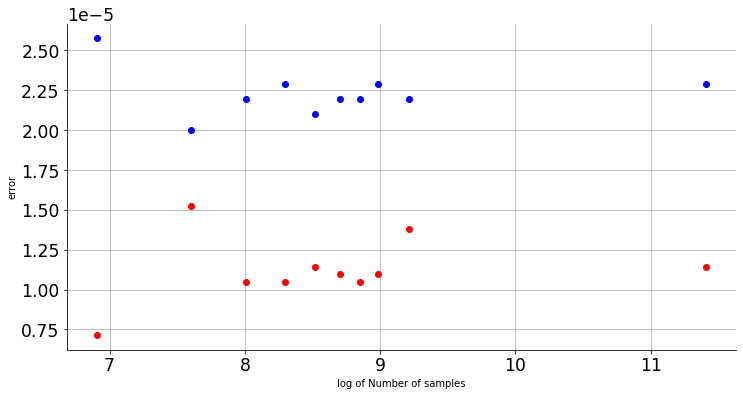

In [48]:
plt.plot(np.log(n_samples_list), error_w, 'ro')
plt.plot(np.log(n_samples_list), error_b, 'bo')
plt.xlabel("log of Number of samples")
plt.ylabel("error")
plt.grid()
plt.show()